In [8]:
import numpy as np
import joblib
import pandas as pd

In [9]:
weight_skills_job = joblib.load('../model_save/skill_weight_job.pkl') 
weight_skills_applicant = joblib.load('../model_save/skill_weight_applicant.pkl')

In [10]:
path = '../../data/profile_data.csv'
applicants = pd.read_csv(path)

D:\software\professional\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
len(applicants)

98855

In [12]:
applicants

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98851,101531,No,Yes,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98852,101541,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98853,101544,Yes,No,Russian Federation,No,"Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
profile = pd.DataFrame(columns=['skills','DevType'])
profile['skills']= applicants['LanguageWorkedWith'] + applicants['DatabaseWorkedWith'] + applicants['PlatformWorkedWith'] + applicants['FrameworkWorkedWith'] + applicants['IDE'] + applicants['OperatingSystem'] + applicants['Methodology'] + applicants['VersionControl']
profile['DevType'] = applicants['DevType']
profile.head(10)

,skills,DevType
0,JavaScript;Python;HTML;CSSRedis;SQL Server;MyS...,Full-stack developer
1,NaN,Database administrator;DevOps specialist;Full-...
2,NaN,Engineering manager;Full-stack developer
3,NaN,Full-stack developer
4,NaN,Data or business analyst;Desktop or enterprise...
5,Java;JavaScript;Python;TypeScript;HTML;CSSMong...,Back-end developer;Database administrator;Fron...
6,JavaScript;HTML;CSSMongoDBLinuxNode.js;ReactAt...,Back-end developer;Front-end developer;Full-st...
7,JavaScript;TypeScript;HTML;CSSMongoDB;MySQL;Mi...,Designer;Front-end developer;QA or test developer
8,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,"Back-end developer;C-suite executive (CEO, CTO..."
9,NaN,Designer


In [14]:
profile = profile.dropna().reset_index(drop=True)
profile['skills'] = profile['skills'].str.lower()
profile['DevType'] = profile['DevType'].str.lower()
profile.head(10)

,skills,DevType
0,javascript;python;html;cssredis;sql server;mys...,full-stack developer
1,java;javascript;python;typescript;html;cssmong...,back-end developer;database administrator;fron...
2,javascript;html;cssmongodblinuxnode.js;reactat...,back-end developer;front-end developer;full-st...
3,javascript;typescript;html;cssmongodb;mysql;mi...,designer;front-end developer;qa or test developer
4,assembly;coffeescript;erlang;go;javascript;lua...,"back-end developer;c-suite executive (ceo, cto..."
5,javamongodb;mysql;oracle;mariadb;elasticsearch...,back-end developer;full-stack developer
6,c#;sql;html;css;bash/shellsql serverlinux;wind...,back-end developer
7,c;c++;go;python;sql;swiftredis;postgresql;sqli...,database administrator;full-stack developer;mo...
8,c;c++;c#;groovy;javascript;python;sql;html;css...,back-end developer;desktop or enterprise appli...
9,c#;javascript;php;sql;html;cssmysqllinux;mac o...,back-end developer;database administrator;desi...


In [15]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
for index,row in profile.iterrows():
    profile_list = re.split('[,/;-]',row['skills'])
    temp = []
    for content in profile_list: 
        content = content.strip()
        content = ps.stem(content)
        if content != ' ' and content != ' ':
            temp.append(content)
    profile['skills'][index] = temp

In [16]:
profile['skills']

0        [javascript, python, html, cssredi, sql server...
1        [java, javascript, python, typescript, html, c...
2        [javascript, html, cssmongodblinuxnode.j, reac...
3        [javascript, typescript, html, cssmongodb, mys...
4        [assembl, coffeescript, erlang, go, javascript...
                               ...                        
35246    [phpmysqlwordpressnode.j, reactvim, xcodemacos...
35247    [php, sqlmysqlwordpressspringeclips, netbean, ...
35248    [python, sql, html, bash, shellsql serv, mysql...
35249    [rubysql serv, postgresql, sqliteamazon echo, ...
35250    [typescript, html, csspostgresqlandroid, io, f...
Name: skills, Length: 35251, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(profile['skills'], profile['DevType'], test_size=0.33, random_state=42)

In [18]:
X_train

9199     [java, javascript, python, sql, html, csssql s...
18359    [javascript, python, rubi, sql, html, css, bas...
12351    [javascript, php, html, css, bash, shellredi, ...
7821     [c#, javascript, sql, swift, html, css, bash, ...
4610     [c, c#, javascript, php, python, sql, html, cs...
                               ...                        
16850    [javascript, sql, typescript, html, cssmysqlaw...
6265     [groovi, java, javascript, sql, html, css, bas...
11284    [javascript, php, python, rubi, sql, swift, ht...
860      [c#, java, sql, kotlinsql serv, postgresqlandr...
15795    [c#, javascript, sql, html, css, bash, shellre...
Name: skills, Length: 23618, dtype: object

In [19]:
X_train.index

Int64Index([ 9199, 18359, 12351,  7821,  4610, 34446, 26801, 27505, 11505,
            12378,
            ...
             2433,   769,  1685, 16023, 21962, 16850,  6265, 11284,   860,
            15795],
           dtype='int64', length=23618)

In [20]:
y_train

9199         data scientist or machine learning specialist
18359    back-end developer;database administrator;devo...
12351    back-end developer;database administrator;devo...
7821                                    back-end developer
4610     back-end developer;database administrator;desi...
                               ...                        
16850                                  front-end developer
6265                                    back-end developer
11284    data or business analyst;full-stack developer;...
860         back-end developer;engineering manager;student
15795    back-end developer;front-end developer;full-st...
Name: DevType, Length: 23618, dtype: object

In [21]:
X_train[9199]

['java',
 'javascript',
 'python',
 'sql',
 'html',
 'csssql server',
 'mysql',
 'amazon dynamodb',
 'amazon redshift',
 'amazon rd',
 'aurora',
 'elasticsearcharduino',
 'aw',
 'windows desktop or servernode.jsintellij',
 'ipython',
 'jupyt',
 'notepad++',
 'pycharm',
 'vim',
 'visual studio codewindowsextreme programming (xp)git']

In [22]:
len(X_train.index)

23618

In [23]:
23618*0.33

7793.9400000000005

In [18]:
applicants_set = {}
for i in range(len(X_train.index)):
    index = X_train.index[i]
    for x in X_train[index]:
        if x not in applicants_set:
            applicants_set[x] =  1
        else:
            applicants_set[x] += 1 

In [20]:
sum_applicants_set = 0
for key in applicants_set:
    sum_applicants_set += applicants_set[key]

for key in applicants_set:
    applicants_set[key] =  np.log(sum_applicants_set / applicants_set[key])

In [21]:
weight_skills_applicant = applicants_set

In [22]:
weight_skills_job =  joblib.load('../model_save/skill_weight_job.pkl') 

In [23]:
jobs = joblib.load('../model_save/cleaned_jobs_data.pkl')

In [24]:
jobs['jobtitle'] = jobs['jobtitle'].str.lower()
for index,row in jobs.iterrows():
        jobs['jobtitle'][index] = ps.stem(row['jobtitle'])

<ipython-input-24-2398bab5d19f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['jobtitle'][index] = ps.stem(row['jobtitle'])


In [25]:
jobs

,level_0,index,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,0,1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",information security engin,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
1,1,2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",business solutions architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"enterprise solutions architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
2,3,4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",devops engin,48 minutes ago,Telecommuting not available|Travel not required,NaN,"configuration management, developer, linux, ma...",45efa1f6bc65acc32bbbb953a1ed13b7
3,4,5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,Dice Id : 10111847,"Chicago, IL",sap fico architect,2 weeks ago,Telecommuting not available|Travel required to...,NaN,"fico, ar, ap, asset management, haha",e0ac9d926dda5e95162ef05adea7318c
4,5,6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,Dice Id : 90884761,"Atlanta, GA",network engin,1 hour ago,Telecommuting not available|Travel not required,NaN,"cisco, dns, http, networking, network engineer...",e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21095,21949,21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,Dice Id : 10112803,"Oakland, CA",web design,3 weeks ago,Telecommuting not available|Travel not required,NaN,"ui/ux mobile apps, interaction design, digital...",86e27ce6b7e631e55d69d142c7d43df2
21096,21950,21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,Dice Id : 10289500,"San Francisco, CA",senior front end web developer - full time at ...,3 weeks ago,Telecommuting not available|Travel not required,NaN,"javascript, html5, css3, bootstrap, ajax, reac...",4287c7ee3317ccf1edd76e238cf8e584
21097,21951,21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,Dice Id : 10115761,"San Francisco, CA",qa analyst,2 weeks ago,Telecommuting not available|Travel not required,NaN,"sdlc, alm, sql, t-sql, redgate, team foundatio...",d7512f0181d69f83f96db38cd77a4d08
21098,21952,21998,https://www.dice.com/jobs/detail/Tech-Lead%252...,IAC Publishing,Full Time,Company Description What We Can Offer YouAs th...,Dice Id : 10112803,"Oakland, CA",tech lead-full stack,2 weeks ago,Telecommuting not available|Travel not required,NaN,"python, ruby, go, clojure, java, nosql-databas...",ec375268b494b3bcbed1635d64226112


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
import datetime
title_jobs_re1 = []
title_jobs_re2 = []
title_jobs_re3 = []

start = datetime.datetime.now()
for i in range(100):
    print(i)
    res = {}
    index = X_test.index[i]
    temp = []
    for j in range(len(jobs)):
        for skill in X_test[index]:
            if  (skill in jobs['skills'][j]) and  (skill in weight_skills_applicant) and (skill in weight_skills_job):
                if (skill in jobs['skills'][j]) and  (skill in weight_skills_applicant):
                    if j not in res:
                        res[j] = weight_skills_job[skill] * weight_skills_applicant[skill] 
                    else:
                         res[j] += weight_skills_job[skill] * weight_skills_applicant[skill]  
    if not res:
        title_jobs_re1.append([])
        title_jobs_re2.append([])
        title_jobs_re3.append([])
    else:
        sorted_res = sorted(res.items(),key = lambda x : x[1] , reverse = True)
        title_jobs_re1.append(jobs.iloc[sorted_res[0][0]]['jobtitle'])
        title_jobs_re2.append(jobs.iloc[sorted_res[1][0]]['jobtitle'])
        title_jobs_re3.append(jobs.iloc[sorted_res[2][0]]['jobtitle'])
end = datetime.datetime.now()
time1 = (start-end).seconds

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [45]:
joblib.dump(title_jobs_re1,'../model_save/title_jobs_re1.pkl')
joblib.dump(title_jobs_re2,'../model_save/title_jobs_re2.pkl')
joblib.dump(title_jobs_re3,'../model_save/title_jobs_re3.pkl')

['../model_save/title_jobs_re3.pkl']

In [46]:
y_test.index

Int64Index([31914, 28868, 12669,  9929,  8731, 32573, 27949, 22467, 34241,
              618,
            ...
             3693, 28315, 14194, 10470,  7208, 18783,  7337, 27014,  6880,
            28260],
           dtype='int64', length=11633)

In [24]:
title_jobs_re1 = joblib.load('../model_save/title_jobs_re1.pkl')
title_jobs_re2 = joblib.load('../model_save/title_jobs_re2.pkl')
title_jobs_re3 = joblib.load('../model_save/title_jobs_re3.pkl')

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tf = TfidfVectorizer()
vec = tf.fit_transform(y_test)
vec_test = vec[0:100]
vec_1 = tf.transform(title_jobs_re1)
vec_2 = tf.transform(title_jobs_re2)
vec_3 = tf.transform(title_jobs_re3)

In [27]:
vec_test.shape

(100, 44)

In [28]:
vec_1.shape

(100, 44)

In [29]:
res = []
for i in range(vec_1.shape[0]):
#     if i == index_del:
#         continue
    score1 = cosine_similarity(vec_test[i,:],vec_1[i,:])[0][0]
    score2 = cosine_similarity(vec_test[i,:],vec_2[i,:])[0][0]
    score3 = cosine_similarity(vec_test[i,:],vec_3[i,:])[0][0]
#     score = (score1 + score2 + score3) / 3
    score = max(score1,score2)
    score = max(score,score3)
#     if score!= 0 :
#         res.append(1)
#     else:
#         res.append(0)
    res.append(score)

In [30]:
acc = sum(res) / len(res)
acc

0.27430636678512144

In [62]:
(0.27-0.13)/0.13

1.076923076923077

### TF-IDF 

In [31]:
profile = joblib.load('../model_save/preprocessed_dfuser_merge.pkl')

In [32]:
profile

,respondent,skills,job type
0,1,javascript python html cssredi sql server mysq...,full stack develop
1,3,javascript python bash shellredi postgresql me...,databa administr devop specialist full stack d...
2,8,java javascript python typescript html cssmong...,back end develop databa administr front end de...
3,9,javascript html cssmongodblinuxnode js react,back end develop front end develop full stack ...
4,10,javascript typescript html cssmongodb mysql mi...,design front end develop qa test develop
...,...,...,...
42124,41097,php sqlmysqlwordpressspring,back end develop desktop enterpris applic develop
42125,43997,python sql html bash shellsql server mysql pos...,back end develop databas administr devop speci...
42126,75556,rubisql server postgresql sqliteamazon echo li...,back end develop front end develop
42127,44306,swiftgoogl bigqueriappl watch appl tvtensorflow,back end develop design game graphic develop m...


In [33]:
jobs = joblib.load('../model_save/preprocessed_dfuser_merge.pkl')

In [34]:
jobs = joblib.load('../model_save/preprocessed_jobs_tfidf.pkl')

In [35]:
jobs

,level_0,index,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,0,1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,linux unix network monitoring incident respo...,8aec88cba08d53da65ab99cf20f6f9d9
1,1,2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,enterprise solutions architecture business in...,46baa1f69ac07779274bcd90b85d9a72
2,3,4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,configuration management developer linux ma...,45efa1f6bc65acc32bbbb953a1ed13b7
3,4,5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,Dice Id : 10111847,"Chicago, IL",SAP FICO Architect,2 weeks ago,Telecommuting not available|Travel required to...,NaN,fico ar ap asset management haha,e0ac9d926dda5e95162ef05adea7318c
4,5,6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,Dice Id : 90884761,"Atlanta, GA",Network Engineer,1 hour ago,Telecommuting not available|Travel not required,NaN,cisco dns http networking network engineer...,e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21095,21949,21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,Dice Id : 10112803,"Oakland, CA",Web Designer,3 weeks ago,Telecommuting not available|Travel not required,NaN,ui ux mobile apps interaction design digital...,86e27ce6b7e631e55d69d142c7d43df2
21096,21950,21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,Dice Id : 10289500,"San Francisco, CA",Senior Front End Web Developer - Full Time at ...,3 weeks ago,Telecommuting not available|Travel not required,NaN,javascript html css bootstrap ajax reac...,4287c7ee3317ccf1edd76e238cf8e584
21097,21951,21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,Dice Id : 10115761,"San Francisco, CA",QA Analyst,2 weeks ago,Telecommuting not available|Travel not required,NaN,sdlc alm sql t sql redgate team foundatio...,d7512f0181d69f83f96db38cd77a4d08
21098,21952,21998,https://www.dice.com/jobs/detail/Tech-Lead%252...,IAC Publishing,Full Time,Company Description What We Can Offer YouAs th...,Dice Id : 10112803,"Oakland, CA",Tech Lead-Full Stack,2 weeks ago,Telecommuting not available|Travel not required,NaN,python ruby go clojure java nosql databas...,ec375268b494b3bcbed1635d64226112


In [36]:
jobs['jobtitle'] = jobs['jobtitle'].str.lower()
for index,row in jobs.iterrows():
        jobs['jobtitle'][index] = ps.stem(row['jobtitle'])

<ipython-input-36-2398bab5d19f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['jobtitle'][index] = ps.stem(row['jobtitle'])


In [37]:
jobs

,level_0,index,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,0,1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",information security engin,1 week ago,Telecommuting not available|Travel not required,NaN,linux unix network monitoring incident respo...,8aec88cba08d53da65ab99cf20f6f9d9
1,1,2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",business solutions architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,enterprise solutions architecture business in...,46baa1f69ac07779274bcd90b85d9a72
2,3,4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",devops engin,48 minutes ago,Telecommuting not available|Travel not required,NaN,configuration management developer linux ma...,45efa1f6bc65acc32bbbb953a1ed13b7
3,4,5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,Dice Id : 10111847,"Chicago, IL",sap fico architect,2 weeks ago,Telecommuting not available|Travel required to...,NaN,fico ar ap asset management haha,e0ac9d926dda5e95162ef05adea7318c
4,5,6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,Dice Id : 90884761,"Atlanta, GA",network engin,1 hour ago,Telecommuting not available|Travel not required,NaN,cisco dns http networking network engineer...,e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21095,21949,21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,Dice Id : 10112803,"Oakland, CA",web design,3 weeks ago,Telecommuting not available|Travel not required,NaN,ui ux mobile apps interaction design digital...,86e27ce6b7e631e55d69d142c7d43df2
21096,21950,21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,Dice Id : 10289500,"San Francisco, CA",senior front end web developer - full time at ...,3 weeks ago,Telecommuting not available|Travel not required,NaN,javascript html css bootstrap ajax reac...,4287c7ee3317ccf1edd76e238cf8e584
21097,21951,21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,Dice Id : 10115761,"San Francisco, CA",qa analyst,2 weeks ago,Telecommuting not available|Travel not required,NaN,sdlc alm sql t sql redgate team foundatio...,d7512f0181d69f83f96db38cd77a4d08
21098,21952,21998,https://www.dice.com/jobs/detail/Tech-Lead%252...,IAC Publishing,Full Time,Company Description What We Can Offer YouAs th...,Dice Id : 10112803,"Oakland, CA",tech lead-full stack,2 weeks ago,Telecommuting not available|Travel not required,NaN,python ruby go clojure java nosql databas...,ec375268b494b3bcbed1635d64226112


In [38]:
tf1 = TfidfVectorizer()
vec_jobs = tf1.fit_transform(jobs['skills'])
vec_profile = tf1.transform(profile['skills'])

In [39]:
vec_jobs.shape

(21100, 9715)

In [40]:
vec_profile.shape

(42129, 9715)

In [42]:
start1 = datetime.datetime.now()
sim = np.zeros((100,len(jobs)))
for i in range(100):
    print(i)
    for j in range(vec_jobs.shape[0]):
        sim[i][j] = cosine_similarity(vec_profile[i,:],vec_jobs[j,:])
end1 = datetime.datetime.now()
time2 =  (start1 - end1).seconds

### evaluate time

In [83]:
time1-time2

611

In [84]:
time1

85912

In [61]:
85912-611

85301

In [4]:
85912 / 100

859.12

In [85]:
time2

85301

In [61]:
max_index = sim.argmax(axis=1)
max_index

array([19141, 15630, 10405,  9096, 20102,  7013,  1289,  1652, 20824,
        4281,  4281,  6837, 19339, 14292,  8237,  9865,  2168,  8237,
       10046,  2547,  7703,  5094, 19911,  9616,  5203,  4861,   443,
        8967, 10405,  5094,  6929, 20102,  9601,  5181,  2168, 11024,
        8237, 11033, 18331, 18018, 17918,  9096, 15630,   530,   460,
        7013,  5105,  7736, 19627,     0, 17758,   460, 16671,  9096,
       14634, 17762, 14634, 16883, 10405,  9096, 17136,  9601,   460,
       19883, 14634,   460,  8750, 19339,  2806,   460,  2168,  4281,
        1941, 14472,   460,   460, 13781, 16307,  6028, 16307,  8246,
       14634,  5094,  1301,  5273,  8246, 11033, 16307,  1402,  4281,
       11033,  5273, 19883,  1289, 11024, 19883,  1531, 20102,  5105,
       19339], dtype=int64)

In [73]:
title_pred = []
#len(max_index)
for i in range(100):
    index = max_index[i]
    title_pred.append(jobs.iloc[index]['jobtitle'])

In [74]:
joblib.dump(title_pred ,'../model_save/title_pred_tfidf.pkl')

['../model_save/title_pred_tfidf.pkl']

In [43]:
title_pred = joblib.load('../model_save/title_pred_tfidf.pkl')

In [45]:
y_test

31914    back-end developer;front-end developer;full-st...
28868    back-end developer;front-end developer;full-st...
12669    back-end developer;designer;front-end develope...
9929                  back-end developer;devops specialist
8731              engineering manager;full-stack developer
                               ...                        
18783                full-stack developer;mobile developer
7337                   back-end developer;mobile developer
27014    back-end developer;database administrator;devo...
6880     back-end developer;database administrator;desi...
28260    back-end developer;designer;full-stack develop...
Name: DevType, Length: 11633, dtype: object

In [46]:
vec_title_pred = tf.transform(title_pred)
vec_profile = tf.transform(profile['job type'])

In [47]:
vec_title_pred.shape[0]

100

In [48]:
res1 = []

for i in range(100):
#     if i == index_del:
#         continue
    score1 = cosine_similarity(vec_profile[i,:],vec_title_pred[i,:])[0][0]
#     if score1 != 0 :
#         res1.append(1)
#     else:
#         res1.append(0)
    res1.append(score1)

In [49]:
acc1 = sum(res1) / len(res1)
acc1

0.13173148677283186

Text(0, 0.5, 'Similarity Score')

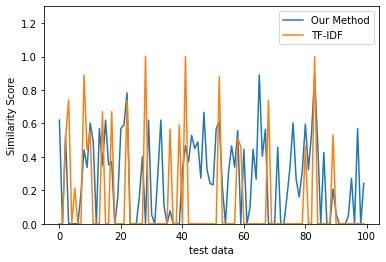

In [60]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(res)
plt.plot(res1)
plt.ylim(0,1.3)
plt.legend(['Our Method','TF-IDF'])
plt.xlabel('test data')
plt.ylabel('Similarity Score')